# Finite Difference Methods for Steady States and Boundary Value Problems

## A simple finite difference method
As a first example of a finite difference method for solving a differential equation, consider the 2-point boundary value problem (BVP),
$$ u''(x) = f(x), \,\,\text{for}\,\, 0 < x < 1, $$
with some given boundary conditions
$$ u(0) = \alpha, \,\, u(1) = \beta.$$
The function $f(x)$ is specified and we wish to determine $u(x)$ in the interval $0 < x < 1$.

In [18]:
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

# environment setting, before any codes
import numpy as np
import numpy.polynomial.legendre as npleg
import scipy.linalg as slinalg

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output, display

### The very first step
The goal is to determine the function $u(x)$ by using the computer.  Therefore, the first question one has to ask is that __how is a function described in the computer__? 
* Gennerally, in computing science, a function is normally described as a discrete function (or say a grid function).

For one dimensional case, the task is rather simple.  We can compute the function only on certian discrete/grid points $x_0, x_1, \ldots, x_m, x_{m+1}$, where $x_j = jh$ and $h = 1/(m+1)$ is the _mesh width_.  For convenience, we denote $U_j$ is our approximation to the solution $u(x_j)$.

For example, considering $f(x) = \sin(\pi x)$ with $0 < x < 1$

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.00000000e+00 3.09016994e-01 5.87785252e-01 8.09016994e-01
 9.51056516e-01 1.00000000e+00 9.51056516e-01 8.09016994e-01
 5.87785252e-01 3.09016994e-01 1.22464680e-16]


<IPython.core.display.Javascript object>


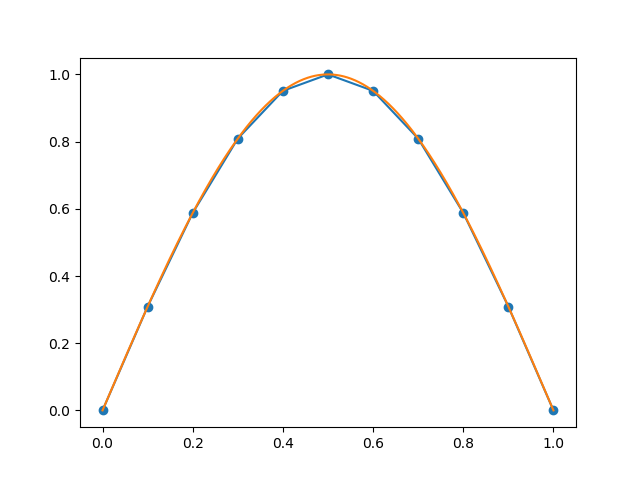

In [14]:
m = 9
x = np.linspace(0, 1, m+2)
f = np.sin(np.pi*x)
print (x)
print (f)

plt.plot(x, f, 'o-')
#plt.show()
x = np.linspace(0, 1, 1001)
plt.plot(x, np.sin(np.pi*x))

### Boundary conditions
How to properly address the boundary conditions is normally a different problem for numerically solving PDEs.  However, for Dirichlet boundary conditions in one dimension that
$$ u(0) = \alpha, \,\, u(1) = \beta,$$ 
it is straightforward to address this issue.  Since we have $x_0 = 0$ and $x_{m+1} = 1$, we know that
$$ U_0 = \alpha, \,\, U_{m+1} = \beta.$$


### Finite difference method
Therefore, we have $m$ unknown values $U_1,\ldots, U_m$ to compute.  The idea of finite difference methods is replace the derivatives ($u''(x)$) in the BVP with finite difference approximation.  Here, we simply replace $u''(x)$ in the BVP by the centered difference approximation 
$$ D^2 U_j = \frac{1}{h}\left(U_{j-1} - 2 U_j + U_{j+1}\right),$$
then we obtain a set of linear equations 
$$ \frac{1}{h}\left(U_{j-1} - 2 U_j + U_{j+1}\right) = f(x_j) = f_j \quad\text{for}\,\, j = 1,\ldots, m.$$
Moving the known values ($U_0$ and $U_{m+1}$) to the right-hand side, we rewrite the algebraic system in the form
$$ AU = F,$$
where $U$ is the vector of unknowns $U = [U_1, U_2, \ldots, U_m]^T$ and 
$$
    A = \frac{1}{h^2}\left[\begin{array}{cccccc}
        -2 &  1 &    &   &    & \\
         1 & -2 &  1 &   &    & \\ 
           &  1 & -2 & 1 &    & \\
           & & \ddots & \ddots &\ddots &\\
           &    &    & 1 & -2 & 1 \\
           &    &    &   &  1 & -2 \end{array}\right],
           \quad
   F = \left[\begin{array}{c} f_1 - \frac{\alpha}{h^2} \\ f_2 \\ f_3 \\ \vdots \\ f_{m-1} \\ f_m - \frac{\beta}{h^2}\end{array}\right]. 
$$

In [24]:
def generate_A(h, m):
    A = np.eye(m, m, -1) - 2*np.eye(m, m) + np.eye(m, m, 1)
    return A/h**2

A = generate_A(1, 6)
print (A)
P, L, U = slinalg.lu(A)
print (L)
print (U)
print (P)

[[-2.  1.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  1. -2.]]
[[ 1.          0.          0.          0.          0.          0.        ]
 [-0.5         1.          0.          0.          0.          0.        ]
 [-0.         -0.66666667  1.          0.          0.          0.        ]
 [-0.         -0.         -0.75        1.          0.          0.        ]
 [-0.         -0.         -0.         -0.8         1.          0.        ]
 [-0.         -0.         -0.         -0.         -0.83333333  1.        ]]
[[-2.          1.          0.          0.          0.          0.        ]
 [ 0.         -1.5         1.          0.          0.          0.        ]
 [ 0.          0.         -1.33333333  1.          0.          0.        ]
 [ 0.          0.          0.         -1.25        1.          0.        ]
 [ 0.          0.          0.          0.         -1.2         1.        ]
 [ 0.      